In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


%load_ext autoreload
%autoreload 2

name: Xiaohui Liu
eid: xl8872

## To Do:

1. Implement the Abelian Sandpile model and simulate its dynamics. I've included a template of the iterative solution below, although feel free to re-factor if you would prefer to implement the problem a different way. To my knowledge, there are three different ways to implement the Abelian sandpile:
    + The iterative solution involves adding a grain and then repeatedly checking the lattice for piles to topple
    + The recursive depth-first-search solution adds a grain and then traces the avalanche that results from each grain toppled by the initial addition.
    + The breadth-first-search solution adds a grain and then simultaneously tracks the four potential avalanches that result from that single grain.
2. Using the code included below, show that avalanche durations exhibit a $1/T^\alpha$ distribution, where $\alpha$ is some constant.

In the plot, it uses logarithmic bins for histogram.  The trend shows a linear like trend, indicates log count = const- $\alpha$ log T, that is count=C/T^$\alpha$.

3. If a single image of the sandpile has size $N$ (the total number of lattice sites), what do you expect to be the worst-case scaling of the runtime of your algorithm? What about the expected scaling of memory usage?

In the worst case, this requires O(N) operations per toppling event. In the worst-case scenario where all cells topple, this results in O(N) toppling events, leading to a time complexity of O(N^2).
The memory is primarily used to store the grid and history of avalanche durations. For a grid of size N, the memory usage scales as O(N).

4. You may have noticed that the waiting time and avalanche size distribution exhibit anomalous scaling in their tails, as visible as a small second peak near the extreme end of the distribution. What causes this effect?

The anomalous second peak in the distribution of avalanche durations is likely due to boundary effects. When avalanches reach the edge of the grid, grains are "lost" because of the absorbing boundary conditions, which reduces the size and duration of avalanches. This can cause a second peak at the high end of the distribution, where large avalanches are suppressed by the boundaries.

5. (Hard, optional) Try [vectorizing](https://realpython.com/numpy-array-programming/) your sandpile implementation, in order to reduce the number of "for" loops used in your implementation. How does vectorization affect the runtime?

**If any experienced student wants to try to implement the Kramer & Marder paper discussed below instead of doing the BTK model, feel free to attempt it. I don't have a solution for it, but I would love to see one.**

In [34]:
class AbelianSandpile:
    """
    An Abelian sandpile model simulation. The sandpile is initialized with a random
    number of grains at each lattice site. Then, a single grain is dropped at a random
    location. The sandpile is then allowed to evolve until it is stable. This process
    is repeated n_step times.

    A single step of the simulation consists of two stages: a random sand grain is
    dropped onto the lattice at a random location. Then, a set of avalanches occurs
    causing sandgrains to get redistributed to their neighboring locations.

    Parameters:
    n (int): The size of the grid
    grid (np.ndarray): The grid of the sandpile
    history (list): A list of the sandpile grids at each timestep
    """

    def __init__(self, n=100, random_state=None):
        self.n = n
        np.random.seed(random_state) # Set the random seed
        self.grid = np.random.choice([0, 1, 2, 3], size=(n, n))
        self.history =[self.grid.copy()] # Why did we need to copy the grid? 
        #A: To store history of states


    def step(self):
        """
        Perform a single step of the sandpile model. Step corresponds a single sandgrain
        addition and the consequent toppling it causes.

        Returns: None
        """
        ########## YOUR CODE HERE ##########
        #raise NotImplementedError
        #
        #
        # My solution starts by dropping a grain, and then solving for all topple events
        # until the sandpile is stable. Watch your boundary conditions carefully.
        # We will use absorbing boundary conditions: excess sand grains fall off the edges
        # of the grid.
        #
        #
    # Add a grain at a random location
        x, y = np.random.randint(0, self.n, size=2)
        self.grid[x, y] += 1

        # Topple until stable
        while np.any(self.grid >= 4):  # Topple while any site exceeds 3 grains
            for i in range(self.n):
                for j in range(self.n):
                    if self.grid[i, j] >= 4:
                        # Topple this site
                        self.grid[i, j] -= 4
                        # Distribute grains to neighbors
                        if i > 0:
                            self.grid[i - 1, j] += 1
                        if i < self.n - 1:
                            self.grid[i + 1, j] += 1
                        if j > 0:
                            self.grid[i, j - 1] += 1
                        if j < self.n - 1:
                            self.grid[i, j + 1] += 1

        # Store the current state in history
        self.history.append(self.grid.copy())


        ########## YOUR CODE HERE ##########


    # we use this decorator for class methods that don't require any of the attributes
    # stored in self. Notice how we don't pass self to the method
    @staticmethod
    def check_difference(grid1, grid2):
        """Check the total number of different sites between two grids"""
        return np.sum(grid1 != grid2)


    def simulate(self, n_step):
        """
        Simulate the sandpile model for n_step steps.
        """
        ########## YOUR CODE HERE ##########
        # raise NotImplementedError
        for _ in range(n_step):
            self.step()
    def plot_avalanche_durations(self):
        """
        Plot the avalanche duration distribution and fit a power-law curve.
        """
        durations = np.array(self.avalanche_durations)
        
        # Plot histogram on log-log scale
        plt.hist(durations, bins=np.logspace(np.log10(1), np.log10(max(durations)), 50), density=True)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Duration (T)')
        plt.ylabel('Probability')
        plt.title('Avalanche Duration Distribution')
        plt.show()

        # Fit the distribution to a power law: P(T) = T^(-alpha)
        def power_law(x, alpha, C):
            return C * x ** (-alpha)

        # Use curve fitting to estimate the exponent
        hist, bin_edges = np.histogram(durations, bins=50, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        popt, _ = curve_fit(power_law, bin_centers[hist > 0], hist[hist > 0])

        alpha = popt[0]
        print(f"Estimated power-law exponent (alpha): {alpha}")

        # Plot the fitted power law
        plt.plot(bin_centers, power_law(bin_centers, *popt), label=f'Fit: T^(-{alpha:.2f})')
        plt.legend()
        plt.show()    


In [19]:
# Create the sandpile model
model = AbelianSandpile(n=100, random_state=0)

# Simulate for n_step steps
model.simulate(1000)


In [2]:
# Check if the "solutions" directory exists. If not, create it and download the solution file
import os
if not os.path.exists('solutions'):
    os.makedirs('solutions')
else:
    print('Directory "solutions" already exists. Skipping creation.')
!wget -P solutions https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/sandpile.py

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


Text(0.5, 1.0, 'Avalanche activity in most recent timesteps')

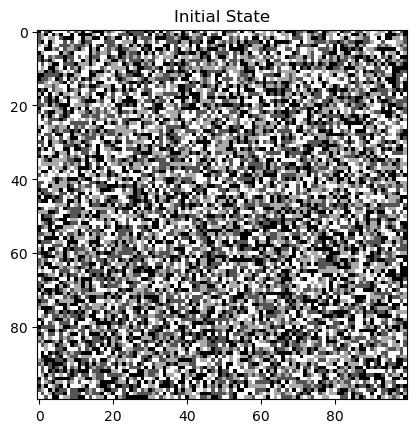

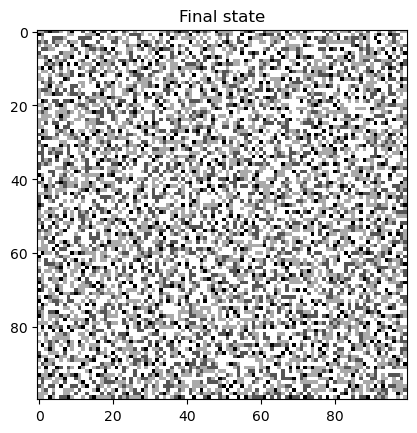

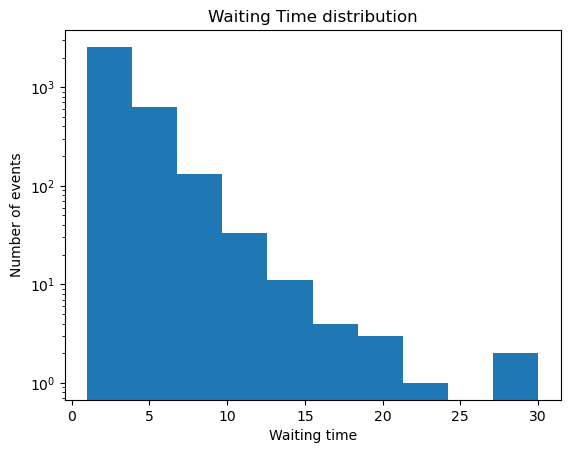

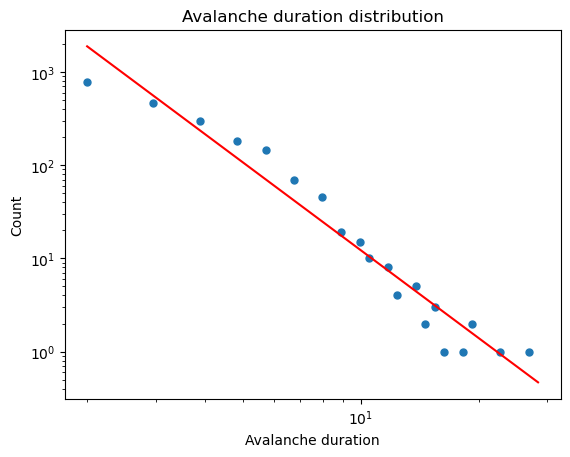

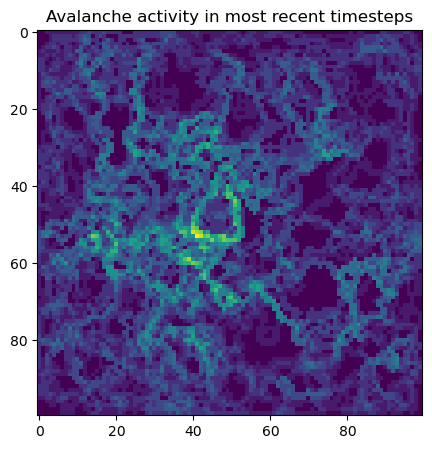

In [48]:
#
# from solutions.sandpile import AbelianSandpileIterative as AbelianSandpile
# from solutions.sandpile import AbelianSandpileBFS as AbelianSandpile
# from solutions.sandpile import AbelianSandpileDFS as AbelianSandpile


# Run sandpile simulation
model = AbelianSandpile(n=100, random_state=0)

plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Initial State")

model.simulate(10000)
plt.figure()
plt.imshow(model.grid, cmap='gray')
plt.title("Final state")




# Compute the pairwise difference between all observed snapshots. This command uses list
# comprehension, a zip generator, and argument unpacking in order to perform this task
# concisely.
all_events =  [model.check_difference(*states) for states in zip(model.history[:-1], model.history[1:])]
# remove transients before the self-organized critical state is reached
all_events = all_events[1000:]
# index each timestep by timepoint
all_events = list(enumerate(all_events))
# remove cases where an avalanche did not occur
all_avalanches = [x for x in all_events if x[1] > 1]
all_avalanche_times = [item[0] for item in all_avalanches]
all_avalanche_sizes = [item[1] for item in all_avalanches]
all_avalanche_durations = [event1 - event0 for event0, event1 in zip(all_avalanche_times[:-1], all_avalanche_times[1:])]


## Waiting time distribution
waiting_times = np.diff(np.array(all_avalanche_times))
plt.figure()
plt.semilogy()
plt.hist(waiting_times)
plt.title('Waiting Time distribution')
plt.xlabel('Waiting time')
plt.ylabel('Number of events')

## Duration distribution
log_bins = np.logspace(np.log10(2), np.log10(np.max(all_avalanche_durations)), 50) # logarithmic bins for histogram
vals, bins = np.histogram(all_avalanche_durations, bins=log_bins)
x, y = bins[:-1], vals
logx = np.log(np.array([x[i] for i in range(len(y)) if y[i] != 0]))
logy = np.log(np.array([y_val for y_val in y if y_val != 0]))
slope, intercept = np.polyfit(logx,logy,1)
plt.figure()
plt.loglog(bins[:-1], vals, '.', markersize=10)

plt.loglog(bins[:-1], bins[:-1]**slope * np.e**intercept, 'r')
plt.title('Avalanche duration distribution')
plt.xlabel('Avalanche duration')
plt.ylabel('Count')

## Visualize activity of the avalanches
# Make an array storing all pairwise differences between the lattice at successive
# timepoints
all_diffs = np.abs(np.diff(np.array(model.history), axis=0))
all_diffs[all_diffs > 0] = 1
all_diffs = all_diffs[np.sum(all_diffs, axis=(1, 2)) > 1] # Filter to only keep big events
most_recent_events = np.sum(all_diffs[-100:], axis=0)
plt.figure(figsize=(5, 5))
plt.imshow(most_recent_events)
plt.title("Avalanche activity in most recent timesteps")

Below shows the O(N^2) time dependence.

Text(0, 0.5, 'Runtime (s)')

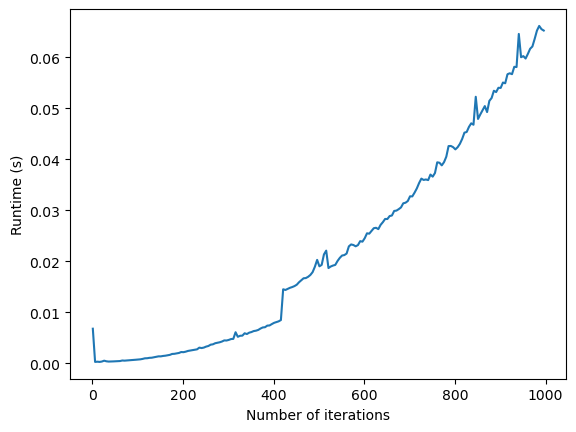

In [35]:
import timeit

n_vals = np.arange(1, 1000, 5)

times = []
for n_point in n_vals:
    times.append(timeit.timeit("AbelianSandpile(n=n_point, random_state=0)", globals=globals(), number=10))

plt.figure()
plt.plot(n_vals, times)

plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")


# Percolation

The BTK cellular automaton represents a great example of a simple, toy computational model that exhibits non-trivial properties found in other, much more elaborate problems. It can be considered a [dynamical universality class](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.72.1690), meaning that many problems map onto it, independently of their microscopic details.

Here, we will consider a well-known example of a universality class describing a nonequilibrium phase transition: the directed percolation problem. This problem is usually attributed to [Broadbent & Hammersley in 1957](https://www.cambridge.org/core/journals/mathematical-proceedings-of-the-cambridge-philosophical-society/article/percolation-processes/C00CC4943F48228F8AC8031092FE84EC).

The basic idea is deceptively simple: given a D-dimensional lattice (for our purposes, a 2D grid), we randomly mark sites as "blocked" with probability $p$. The remaining sites are "open" for water to flow. For a given value of $p$, what is the probability that water poured into the top of the lattice will percolate to the bottom row through a chain of connected open sites? This problem is *directed percolation* because it has a preferred direction (water flows from top to bottom). We will assume two open sites are connected if one is north, south, east, or west of the other---but *not* diagonal. This corresponds to [von Neumann neighborhood rules](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood).

A percolation simulation should take a binary array, and return True if it percolates, and False if it does not. There are many ways to implement a percolation algorithm, most of which involve simulating the addition of water to the grid.
+ *Iterative Solution.* One option would be start with the top row, mark all open sites as "filled," and then pass to the next row and search for open sites connected to filled sites. Some addtional care is required, however, because water can pass through channels within a row until it reaches sites that are not directly below filled sites. One workaround would be to perform multiple iterative passes until the filled lattice stops changing. Another edge case is the case where water needs to pass through an uphill channel in order to make it to the bottom---this can be solved by passing over the lattice first from top to bottom, and then vice versa.
+ *Depth-first search (DFS).* Another simulation option would be a depth-first-search, where we start from each site on the top row and we search for any chain of North/Sout/East/West hops that leads to the other side of the lattice, marking all visited sites as filled with water. This last methods demonstrates the conceptual simularity between directed percolation and solving a maze puzzle; the only difference that the "blocked" sites in a maze are non-random.

Here we are going to implemented a directed percolation model, and then perform experiments with it in order to determine how the percolation probability depends on the fraction of blocked sites $p$.

## To Do

1. Implement a two dimensional directed percolation model in Python. I've included my code outline below.
    + The iterative solution simulates water pouring into the top row, and then iterate over rows and sites. With this solution, there is some difficulty regarding how to handle the case where water can flow through a channel from right to left, even though we normally iterate from left to right. This can be solved by passing over each row twice. However, there is also a the case where water needs to pass uphill through a channel before it can proceed downhill. This can be solved by passing over the lattice from top to bottom, and then vice versa.
    + Can you think of a faster way of solving this problem? (Hint: we may not have seen recursion in class yet, but it may be helpful). If you want to try implementing your solution, you will need to add an additional private method `_flow_recursive(i, j)` that contains the recursive logic
2. Perform replicate simulations using the code I've provided below, and create a plot showing how the probability of percolation changes as a function of $p$ (the blockage probability). Beyond seeing the percolation to clogging transition, you'll notice that the variance in the outcome of your simulations behaves unexpectedly. What is going on here? (Hint: If you've studied the Ising model, you've seen something like this before)

As you vary p from low to high, you’ll observe a percolation transition — initially, the system easily percolates at low blockage probabilities, but as p increases, the probability of percolation drops sharply.

3. Theoretically, does the transition point seen in our empirical results align with your intuition? Why does its value differ from $p=0.5$? (Hint: think about sites versus connections between sites).

The transition point is expected to differ from p = 0.5 because this system depends not only on the probability of individual sites being open but also on the connectivity between neighboring sites. This is similar to the concept of "bond percolation" vs. "site percolation" in statistical physics. The transition occurs at a value lower than p = 0.5 because sites can still be connected in a way that allows percolation despite some blockage.

4. How does the memory usage and runtime of your percolation model implement scale with the lattice size? You can answer this empirically or theoretically.

Memory Usage: The memory usage scales as O(n^2), since we store two n x n grids (grid and grid_filled).
Runtime: In the iterative solution, we scan each site twice (top-to-bottom and bottom-to-top), so the runtime scales as O(n^2) for each iteration. If we had a recursive implementation, the depth of the recursion could potentially lead to longer runtime, but the space complexity would be similar.

5. One way to sweep the control parameter $p$ would be to start in a limit where most of the sites are blocked, and then gradually open up individual sites one at a time until the lattice percolates. A video of a simulation where the lattice is gradually opened can be seen [here](https://vimeo.com/747772333). How do the different events in this gradually unblocked percolation simulation relate to the two timescales we saw in the sandpile problem?

The timescales for sandpile avalanches and percolation blocking events are conceptually similar. In percolation, the transition from unblocked to fully clogged resembles the critical state in the sandpile model, where small changes in the grid's structure can either result in no significant event or a system-wide change, similar to how avalanches behave in the sandpile model.

In [90]:
import numpy as np
import matplotlib.pyplot as plt
class PercolationSimulation:
    """
    A simulation of a 2D directed percolation problem. Given a 2D lattice, blocked sites
    are denoted by 0s, and open sites are denoted by 1s. During a simulation, water is
    poured into the top of the grid, and allowed to percolate to the bottom. If water
    fills a lattice site, it is marked with a 2 in the grid. Water only reaches a site
    if it reaches an open site directly above, or to the immediate left or right
    of an open site.
    """

    def __init__(self, n=100, p=0.5, grid=None, random_state=None):
        """
        Initialize a PercolationSimulation object.
        Args:
            n (int): number of rows and columns in the lattice
            p (float): probability of a site being blocked in the randomly-sampled lattice
            random_state (int): random seed for numpy's random number generator.
        """
        self.random_state = random_state

        if grid is None:
            self.n = n
            self.p = p
            self.grid = np.zeros((n, n))
            self._initialize_grid()
        else:
            assert len(np.unique(np.ravel(grid))) <= 2, "Grid must only contain 0s and 1s"
            self.grid = grid.astype(int)
            self.n = grid.shape[0]
            self.p = 1 - np.mean(grid)

        self.grid_filled = np.copy(self.grid)

    
    def _initialize_grid(self):
        """
        Initialize the grid with blocked (0) and open (1) sites randomly.
        """
        np.random.seed(self.random_state)
        self.grid = np.random.binomial(n=1, p=1-self.p, size=(self.n, self.n))
        
        self.grid_filled = np.copy(self.grid)
        

    
    def _flow_recursive(self, i, j):
        """
        Recursively simulate the flow of water through the grid.
        """
        # Base cases
        if i < 0 or i >= self.n or j < 0 or j >= self.n:  # Out of bounds
            return None
        if self.grid[i, j] == 0:  # Blocked site
            return None
        if self.grid_filled[i, j] == 2:  # Already filled with water
            return None

        # Fill the current site with water
        self.grid_filled[i, j] = 2

        # Recursively fill neighboring sites
        self._flow_recursive(i - 1, j)  # Up
        self._flow_recursive(i + 1, j)  # Down
        self._flow_recursive(i, j - 1)  # Left
        self._flow_recursive(i, j + 1)  # Right

    
    def _poll_neighbors(self, i, j):
        """
        Check if there is a water-filled site adjacent to (i, j).
        """
        # Boundary conditions are handled by checking indices
        return (
            (i > 0 and self.grid_filled[i - 1, j] == 2) or  # Above
            (i < self.n - 1 and self.grid_filled[i + 1, j] == 2) or  # Below
            (j > 0 and self.grid_filled[i, j - 1] == 2) or  # Left
            (j < self.n - 1 and self.grid_filled[i, j + 1] == 2)  # Right
        )
    
    # def _flow(self):
    #     """
    #     Simulate water flow through the grid using a row-wise loop.
    #     """
    #     # Water starts flowing from the top row
    #     for j in range(self.n):
    #         if self.grid[0, j] == 1:
    #             self.grid_filled[0, j] = 2

    #     # Iterate over the rest of the rows and check neighbors
    #     for i in range(1, self.n):
    #         for j in range(self.n):
    #             if self.grid[i, j] == 1 and self._poll_neighbors(i, j):
    #                 self.grid_filled[i, j] = 2
    def _flow(self):
        """
        Run a percolation simulation using recursion

        This method writes to the grid and grid_filled attributes, but it does not
        return anything. In other languages like Java or C, this method would return
        void
        """

        # Try flowing water from each  cell in the topp row
        for j in range(0, self.n):
            self._flow_recursive(0,j)

    def percolate(self):
        """
        Initialize a random lattice and run the percolation simulation.
        Return True if water reaches the bottom row.
        """
        self._initialize_grid()  # Initialize the random grid
        self._flow()  # Run the percolation simulation

        # Check if any site in the bottom row is filled with water
        return np.any(self.grid_filled[-1, :] == 2)



In [24]:
# Check if the "solutions" directory exists. If not, create it and download the solution file
import os
if not os.path.exists('solutions'):
    os.makedirs('solutions')
else:
    print('Directory "solutions" already exists. Skipping creation.')
!wget -P solutions https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/percolation.py

Directory "solutions" already exists. Skipping creation.


'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


True
True
False


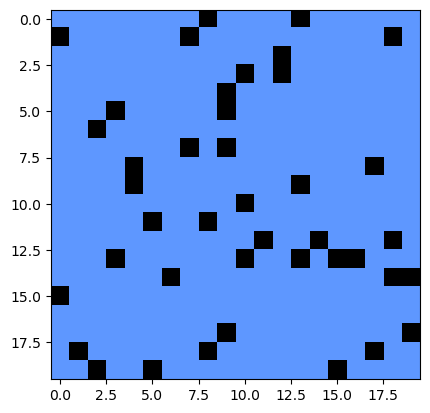

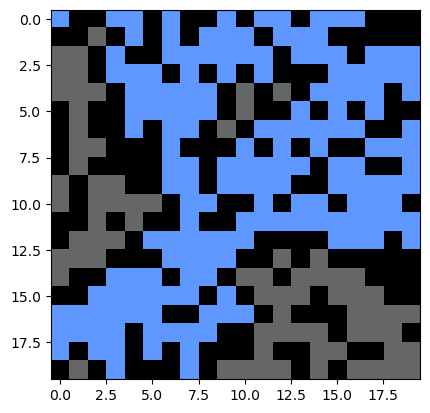

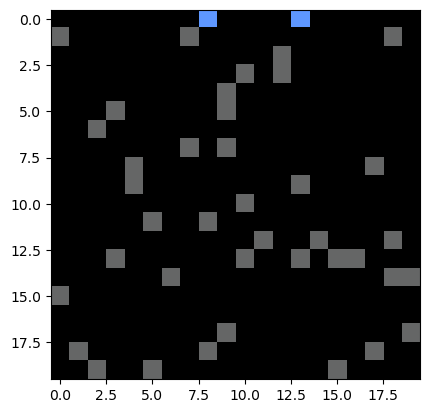

In [91]:
# Import William's solution
# from solutions.percolation import PercolationSimulation
# from solutions.percolation_iterative import PercolationSimulation

from matplotlib.colors import LinearSegmentedColormap
def plot_percolation(mat):
    """
    Plots a percolation matrix, where 0 indicates a blocked site, 1 indicates an empty
    site, and 2 indicates a filled site
    """
    cvals  = [0, 1, 2]
    colors = [(0, 0, 0), (0.4, 0.4, 0.4), (0.372549, 0.596078, 1)]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plt.imshow(mat, cmap=cmap, vmin=0, vmax=2)


model = PercolationSimulation(n=20, random_state=0, p=0.1)
print(model.percolate())
plt.figure()
plot_percolation(model.grid_filled)

model = PercolationSimulation(n=20, random_state=0, p=0.4)
print(model.percolate())
plt.figure()
plot_percolation(model.grid_filled)


model = PercolationSimulation(n=20, random_state=0, p=0.9)
print(model.percolate())
plt.figure()
plot_percolation(model.grid_filled)

Running replicate simulations for p = 0.0
Running replicate simulations for p = 0.041666666666666664
Running replicate simulations for p = 0.08333333333333333
Running replicate simulations for p = 0.125
Running replicate simulations for p = 0.16666666666666666
Running replicate simulations for p = 0.20833333333333331
Running replicate simulations for p = 0.25
Running replicate simulations for p = 0.29166666666666663
Running replicate simulations for p = 0.3333333333333333
Running replicate simulations for p = 0.375
Running replicate simulations for p = 0.41666666666666663
Running replicate simulations for p = 0.4583333333333333
Running replicate simulations for p = 0.5
Running replicate simulations for p = 0.5416666666666666
Running replicate simulations for p = 0.5833333333333333
Running replicate simulations for p = 0.625
Running replicate simulations for p = 0.6666666666666666
Running replicate simulations for p = 0.7083333333333333
Running replicate simulations for p = 0.75
Running

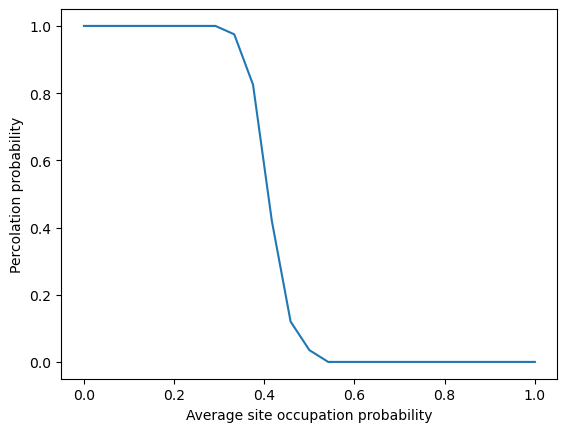

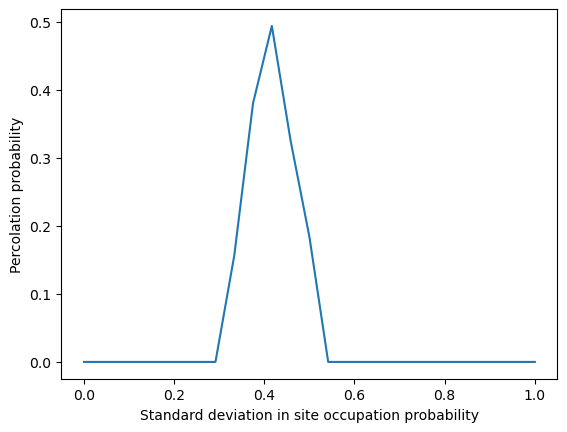

Finished simulation 0
Finished simulation 500
Finished simulation 1000
Finished simulation 1500
Finished simulation 2000
Finished simulation 2500
Finished simulation 3000
Finished simulation 3500
Finished simulation 4000
Finished simulation 4500


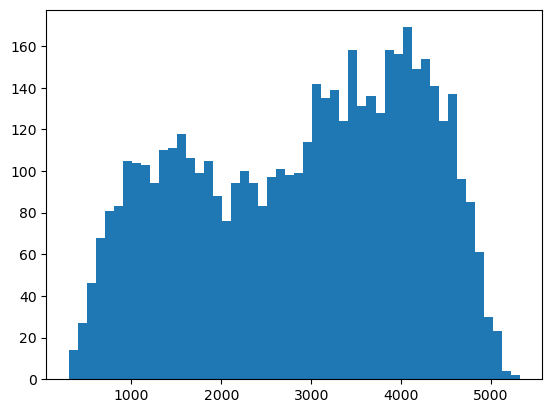

In [92]:

# Import William's solution
#from solutions.percolation import PercolationSimulation

pvals = np.linspace(0, 1, 25) # control parameter for percolation phase transition
n_reps = 200 # number of times to repeat the simulation for each p value

all_percolations = list()
for p in pvals:
    print("Running replicate simulations for p = {}".format(p), flush=True)
    all_replicates = list()
    for i in range(n_reps):
        # Initialize the model
        model = PercolationSimulation(30, p=p)
        all_replicates.append(model.percolate())
    all_percolations.append(all_replicates)

plt.figure()
plt.plot(pvals, np.mean(np.array(all_percolations), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('Percolation probability')

plt.figure()
plt.plot(pvals, np.std(np.array(all_percolations), axis=1))
plt.xlabel('Standard deviation in site occupation probability')
plt.ylabel('Percolation probability')

plt.show()


## Just from curiousity, plot the distribution of cluster sizes at the percolation threshold
## why does it appear to be bimodal?
all_cluster_sizes = list()
p_c = 0.407259
n_reps = 5000
for i in range(n_reps):
    model = PercolationSimulation(100, p=p_c)
    model.percolate()
    cluster_size = np.sum(model.grid_filled == 2)
    all_cluster_sizes.append(cluster_size)

    if i % 500 == 0:
        print("Finished simulation {}".format(i), flush=True)

all_cluster_sizes = np.array(all_cluster_sizes)

plt.figure()
plt.hist(all_cluster_sizes, 50);


Text(0, 0.5, 'Runtime (s)')

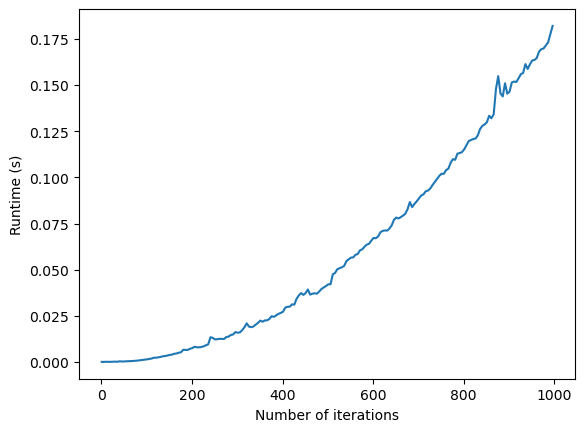

In [93]:
import timeit

n_vals = np.arange(1, 1000, 5)

times = []
for n_point in n_vals:
    times.append(timeit.timeit("PercolationSimulation(n=n_point, random_state=0)", globals=globals(), number=10))

plt.figure()
plt.plot(n_vals, times)

plt.xlabel("Number of iterations")
plt.ylabel("Runtime (s)")

In [84]:
initial_lattice = np.zeros((50, 50))

# Decide the order in which sites become blocked
np.random.seed(0)
all_lattice_indices = np.array(
    [(i, j) for i in range(initial_lattice.shape[0]) for j in range(initial_lattice.shape[1])]
)
np.random.shuffle(all_lattice_indices)

# does percolate 
all_grids = list()
for inds in all_lattice_indices:
    
    initial_lattice[inds[0], inds[1]] = 1
    model = PercolationSimulation(grid=initial_lattice)
    model.percolate()

    if (model.p > 0.3) and (model.p < 0.7):
        all_grids.append(np.copy(model.grid_filled))

    

In [85]:
## Make an interactive video
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

def plotter(i):
    fig = plt.figure(figsize=(10, 10))
    plot_percolation(all_grids[i])
    plt.show()



interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(all_grids) - 1, layout=Layout(width='500px'))
)

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='500px'), max=999), Output()), _…

<function __main__.plotter(i)>